/var/folders/rk/39crvkc51fx35663rl7sj8cm0000gn/T/ipykernel_27361/1679559248.py:75: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  query_point.set_data(qp[0], qp[1])
/var/folders/rk/39crvkc51fx35663rl7sj8cm0000gn/T/ipykernel_27361/1679559248.py:83: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  neighbor_plot.set_data(neighbor_coords[i, 0], neighbor_coords[i, 1])
/var/folders/rk/39crvkc51fx35663rl7sj8cm0000gn/T/ipykernel_27361/1679559248.py:75: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  query_point.set_data(qp[0], qp[1])
/var/folders/rk/39crvkc51fx35663rl7sj8cm0000gn/T/ipykernel_27361/1679559248.py:83: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two 

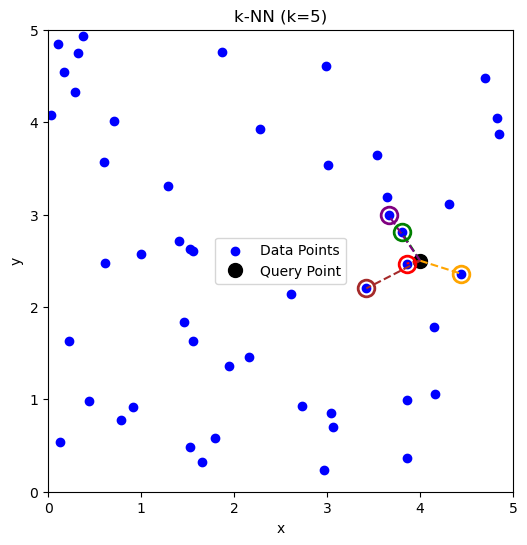

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from sklearn.neighbors import NearestNeighbors

# --------------------------
# Data Generation and Setup
# --------------------------

# Set random seed for reproducibility
np.random.seed(42)

# Generate 50 random 2D data points in the [0, 5] x [0, 5] region.
X = 5 * np.random.rand(50, 2)

# Create a NearestNeighbors object with k=5
k = 5
nbrs = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(X)

# --------------------------
# Animation Setup
# --------------------------

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_title('k-NN (k=5)')
ax.set_xlabel('x')
ax.set_ylabel('y')

# Plot the training data points (blue)
ax.scatter(X[:, 0], X[:, 1], c='blue', label='Data Points')

# Initialize the query point (black circle)
query_point, = ax.plot([], [], 'ko', markersize=10, label='Query Point')

# Initialize lines connecting the query point to its 5 neighbors (dashed lines in different colors)
neighbor_colors = ['red', 'green', 'orange', 'purple', 'brown']
lines = [ax.plot([], [], c=color, linestyle='--')[0] for color in neighbor_colors]

# Initialize markers for the neighbors (using larger markers with no fill)
neighbors_plots = [
    ax.plot([], [], marker='o', markersize=12, linestyle='', markerfacecolor='none', markeredgewidth=2, color=color)[0]
    for color in neighbor_colors
]

# --------------------------
# Define the Query Path
# --------------------------

# We'll animate a query point moving in a circle centered at (2.5, 2.5) with radius 1.5.
num_frames = 100
angles = np.linspace(0, 2 * np.pi, num_frames)
query_x = 2.5 + 1.5 * np.cos(angles)
query_y = 2.5 + 1.5 * np.sin(angles)
query_positions = np.column_stack((query_x, query_y))

# --------------------------
# Animation Functions
# --------------------------

def init():
    """Initialize the animation frame."""
    query_point.set_data([], [])
    for line in lines:
        line.set_data([], [])
    for neighbor_plot in neighbors_plots:
        neighbor_plot.set_data([], [])
    return [query_point] + lines + neighbors_plots

def update(frame):
    """Update the animation for a given frame."""
    # Current query point position
    qp = query_positions[frame]
    query_point.set_data(qp[0], qp[1])
    
    # Find the k=5 nearest neighbors to the query point
    distances, indices = nbrs.kneighbors(qp.reshape(1, -1))
    neighbor_coords = X[indices[0]]
    
    # Update the neighbor markers and the lines connecting the query point to each neighbor.
    for i, neighbor_plot in enumerate(neighbors_plots):
        neighbor_plot.set_data(neighbor_coords[i, 0], neighbor_coords[i, 1])
        lines[i].set_data([qp[0], neighbor_coords[i, 0]], [qp[1], neighbor_coords[i, 1]])
    
    return [query_point] + lines + neighbors_plots

# Create the animation
anim = FuncAnimation(fig, update, frames=num_frames, init_func=init, blit=True, interval=100)

# --------------------------
# Save the Animation as GIF
# --------------------------
writer = PillowWriter(fps=10)
anim.save("knn_animation.gif", writer=writer)

# Add legend and display the plot window (optional)
ax.legend()
plt.show()
